## **1. Data exploration**

We have at our disposal several datasets that we will combined and face images. These elements are in the file ```img_align_celeba.zip```. Let's explore each element of this file.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from tensorflow.keras.preprocessing.image import load_img, img_to_array
%matplotlib inline

Connection to my drive

In [0]:
drive.mount('/content/gdrive', force_remount = True)

Unzipping the file with the images

In [0]:
with zipfile.ZipFile('/content/gdrive/My Drive/BigData/Project/celeba-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

### ***a) img_align_celeba folder***

In this folder there are 202 599 pictures of faces that are cropped and aligned.

(218, 178, 3)


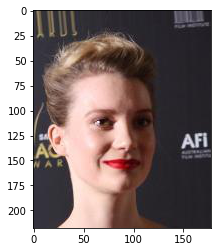

In [0]:
images_folder = '/content/img/img_align_celeba/img_align_celeba/'
example_pic = '000100.jpg'
ex_img = images_folder + example_pic
img = load_img(ex_img)
print(img_to_array(img).shape)
plt.grid(False)
plt.imshow(img)

### ***b) list_eval_partition.csv***

This table contains a recommended partitioning of images into training (images 1-162770), validation (images 162771-182637) and testing sets (images 182638-202599).

In [0]:
df_eval = pd.read_csv('/content/img/list_eval_partition.csv')
df_eval.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [0]:
df_eval.partition.unique()
# 0 = train set
# 1 = validation set
# 2 = test set

array([0, 1, 2])

### ***c) list_bbox_celeba.csv***

This csv file has informations about the images bounding box. There are 2 columns *x_1* and *y_1* that represent the upper left point coordinate of each bounding box and the columns *width* and *height* represent the width and height of the bounding boxes.

In [0]:
df_bbox = pd.read_csv('/content/img/list_bbox_celeba.csv')
df_bbox = df_bbox.rename(columns = {"x_1": "xmin", "y_1": "ymin", "width" : "xmax", "height" : "ymax"})
df_bbox.loc[df_bbox.image_id == example_pic] # Bounding box coordinates of the exmaple_pic

,image_id,xmin,ymin,xmax,ymax
99,000100.jpg,284,140,364,504


### ***d) list_landmarks_align_celeba.csv***

This file contains informations regarding the coordinates of landmarks. There are 5 landmarks: left eye, right eye, nose, left mouth, right mouth

In [0]:
df_landmarks = pd.read_csv('/content/img/list_landmarks_align_celeba.csv')
df_landmarks.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [0]:
landmarks_eye = df_landmarks[['image_id','lefteye_x', 'lefteye_y', 
                              'righteye_x', 'righteye_y']].set_index('image_id')
landmarks_eye.head()

In [0]:
plt.imshow(img)
plt.scatter(landmarks_eye.loc[example_id][['lefteye_x', 'righteye_x']], 
            landmarks_eye.loc[example_id][['lefteye_y', 'righteye_y']],
            c = 'r')

### ***e) list_attr_celeba.csv***

This table is filled with the attributes labels of each image.

In [0]:
df_attr = pd.read_csv('/content/img/list_attr_celeba.csv')
df_attr.replace(to_replace = -1, value = 0, inplace = True)
print(df_attr.shape)
df_attr.head()

(202599, 41)


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [0]:
df_attr[['Smiling', 'Male', 'Young']].loc[df_attr.image_id == example_pic]

,Smiling,Male,Young
99,0,0,1


***i) Univariate analysis***

We decided to focus on the 15 attributes defined below in the ```VarToKeep``` list.

In [0]:
VarToKeep = ["image_id", "Attractive", "Bald", "Black_Hair", "Blond_Hair", 
             "Brown_Hair", "Eyeglasses", "Gray_Hair", "Male", "Mustache", 
             "No_Beard", "Pale_Skin", "Smiling", "Straight_Hair", "Wavy_Hair",
             "Young"]
df_attr = df_attr[VarToKeep]
df_attr.shape

(202599, 16)

In [0]:
#NumVar = df_attr.select_dtypes('int64').columns.tolist()
#df_attr = df_attr[VarToKeep]
df_attr.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
image_id,202599,202599,158593.jpg,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attractive,202599,NaN,NaN,NaN,0.512505,0.499845,0,0,1,1,1
Bald,202599,NaN,NaN,NaN,0.0224433,0.148121,0,0,0,0,1
Black_Hair,202599,NaN,NaN,NaN,0.239251,0.426627,0,0,0,0,1
Blond_Hair,202599,NaN,NaN,NaN,0.147992,0.355093,0,0,0,0,1
Brown_Hair,202599,NaN,NaN,NaN,0.205194,0.403844,0,0,0,0,1
Eyeglasses,202599,NaN,NaN,NaN,0.0651188,0.246736,0,0,0,0,1
Gray_Hair,202599,NaN,NaN,NaN,0.0419499,0.200475,0,0,0,0,1
Male,202599,NaN,NaN,NaN,0.416754,0.493023,0,0,0,1,1
Mustache,202599,NaN,NaN,NaN,0.0415451,0.199548,0,0,0,0,1


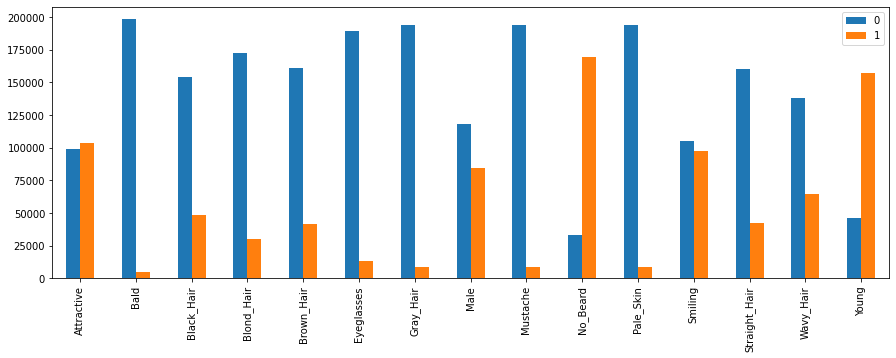

In [0]:
NumVar = df_attr.select_dtypes('int64').columns.tolist()
df_attr[NumVar].apply(pd.value_counts).fillna(0).T.plot(kind = 'bar', figsize = (15,5))

***ii) Bivariate analysis***

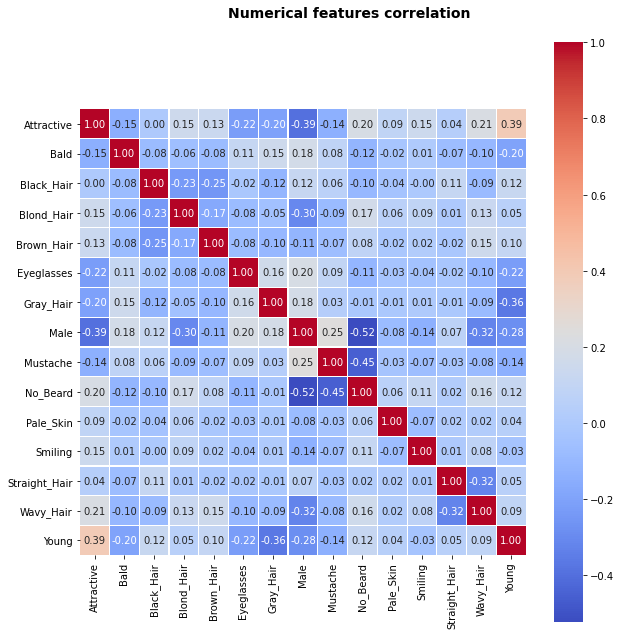

In [0]:
fig, (ax) = plt.subplots(1, 1, figsize = (10,10))
corr = df_attr[NumVar].corr()
hm = sns.heatmap(corr, 
                 ax = ax,           
                 cmap = "coolwarm", #viridis
                 square = True,    
                 annot = True, 
                 fmt = '.2f',
                 linewidths = .05)

fig.subplots_adjust(top = 0.93)
fig.suptitle('Numerical features correlation', 
             fontsize = 14, fontweight = 'bold')
plt.show()


In [0]:
#Number of features per images
NbFeatures = df_attr.set_index('image_id')
NbFeatures = pd.DataFrame(NbFeatures[NumVar].sum(axis = 1)).rename(columns = {0 : "nb_attr"})
NbImg = 20
NbFeatures = NbFeatures[:NbImg]
print(NbFeatures.shape)
NbFeatures.head()

(20, 1)


,nb_attr
image_id,
000001.jpg,6
000002.jpg,4
000003.jpg,4
000004.jpg,4
000005.jpg,3


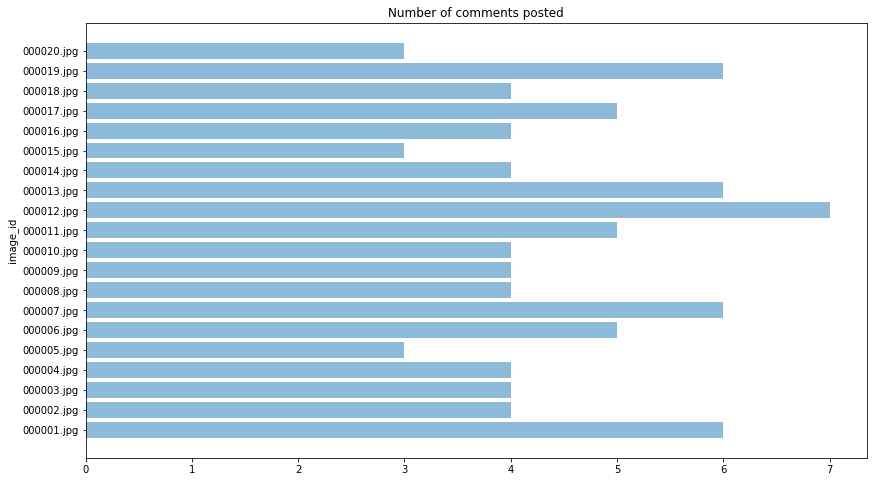

In [0]:
plt.figure(figsize = (14, 8))

y_pos = np.arange(len(NbFeatures.index))
plt.barh(y_pos, NbFeatures['nb_attr'], align = 'center', alpha = 0.5)
plt.yticks(y_pos, NbFeatures.index)
plt.ylabel('image_id')
plt.title('Number of comments posted')
plt.show()